![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [2]:
# Ignorar advertencias informativas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Llamado de librerías
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [7]:
# Inicializar lista para guardar resultados (para comparar)
resultados_modelos = []

# Función actualizada
def evaluacion_modelo(y_train, y_train_pred, y_test, y_test_pred, nombre_modelo="Modelo"):
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"\n=== RESULTADOS DEL {nombre_modelo} ===")
    print("Rendimiento del conjunto de entrenamiento:")
    print(f"MAE: {mae_train:.2f}")
    print(f"RMSE: {rmse_train:.2f}")
    print("Rendimiento del conjunto de prueba:")
    print(f"MAE: {mae_test:.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    
    # Guardar resultados en la lista global
    resultados_modelos.extend([
        {"Modelo": nombre_modelo, "Tipo": "Entrenamiento", "Metrica": "MAE", "Valor": mae_train},
        {"Modelo": nombre_modelo, "Tipo": "Prueba", "Metrica": "MAE", "Valor": mae_test},
        {"Modelo": nombre_modelo, "Tipo": "Entrenamiento", "Metrica": "RMSE", "Valor": rmse_train},
        {"Modelo": nombre_modelo, "Tipo": "Prueba", "Metrica": "RMSE", "Valor": rmse_test}
    ])


### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [8]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [9]:
# Modelado por medio de Bagging manual 
np.random.seed(42)                     # Fijamos la semilla para reproducibilidad
n_trees = 10                           # Número de árboles
trees = []                             # Listas para guardar los modelos

# Predicciones de cada árbol
predictions_test = []
predictions_train = []

print("=== INICIANDO BAGGING MANUAL CON " + str(n_trees) + " ÁRBOLES" )

# Entrenamiento con Bagging
for i in range(n_trees):
    print(f"\n--- Árbol {i+1} ---")
    
    # Muestra bootstrap
    bootstrap_idx = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
# print("Índices bootstrap (primeros 10):", bootstrap_idx[:10])
    
    X_bootstrap = X_train.iloc[bootstrap_idx]
    y_bootstrap = y_train.iloc[bootstrap_idx]
    
    # Modelo
    tree = DecisionTreeRegressor(max_depth=3, random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    # Predicciones
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    predictions_train.append(pred_train)
    predictions_test.append(pred_test)   
# print("Predicciones en test (primeros 5):", pred_test[:5])
    
    # Evaluación individual de los árboles Bootstrap
    mae_individual = mean_absolute_error(y_test, pred_test)
    rmse_individual = np.sqrt(mean_squared_error(y_test, pred_test))
    print(f"MAE individual: {mae_individual:.2f}")
    print(f"RMSE individual: {rmse_individual:.2f}")

# Promedio de predicciones
y_train_bgm = np.mean(predictions_train, axis=0)
y_test_bgm = np.mean(predictions_test, axis=0)

# Evaluación del modelo ensamblado
evaluacion_modelo(y_train, y_train_bgm, y_test, y_test_bgm, nombre_modelo="Bagging Manual")


=== INICIANDO BAGGING MANUAL CON 10 ÁRBOLES

--- Árbol 1 ---
MAE individual: 1436.14
RMSE individual: 1906.20

--- Árbol 2 ---
MAE individual: 1456.77
RMSE individual: 1931.26

--- Árbol 3 ---
MAE individual: 1448.48
RMSE individual: 1929.47

--- Árbol 4 ---
MAE individual: 1438.17
RMSE individual: 1914.94

--- Árbol 5 ---
MAE individual: 1464.04
RMSE individual: 1940.77

--- Árbol 6 ---
MAE individual: 1483.79
RMSE individual: 1958.25

--- Árbol 7 ---
MAE individual: 1455.95
RMSE individual: 1932.18

--- Árbol 8 ---
MAE individual: 1456.75
RMSE individual: 1927.10

--- Árbol 9 ---
MAE individual: 1451.83
RMSE individual: 1926.48

--- Árbol 10 ---
MAE individual: 1455.17
RMSE individual: 1934.19

=== RESULTADOS DEL Bagging Manual ===
Rendimiento del conjunto de entrenamiento:
MAE: 1325.36
RMSE: 1791.11
Rendimiento del conjunto de prueba:
MAE: 1360.67
RMSE: 1825.21


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [10]:
# Número de características
n_features = X_train.shape[1]
max_features_log = int(np.log(n_features))

# Entrenamiento del modelo con sklearn
bagging_model_log = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=10,
    max_features=max_features_log,
    random_state=42
)
bagging_model_log.fit(X_train, y_train)

# Predicciones
y_train_bgl = bagging_model_log.predict(X_train)
y_test_bgl = bagging_model_log.predict(X_test)

# Evaluación del modelo 
evaluacion_modelo(y_train, y_train_bgl, y_test, y_test_bgl, nombre_modelo="BaggingRegressor (sklearn)")


=== RESULTADOS DEL BaggingRegressor (sklearn) ===
Rendimiento del conjunto de entrenamiento:
MAE: 2161.97
RMSE: 2789.16
Rendimiento del conjunto de prueba:
MAE: 2160.76
RMSE: 2768.35


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [11]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [12]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [13]:
# Celda 6


### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [14]:
# Celda 7


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

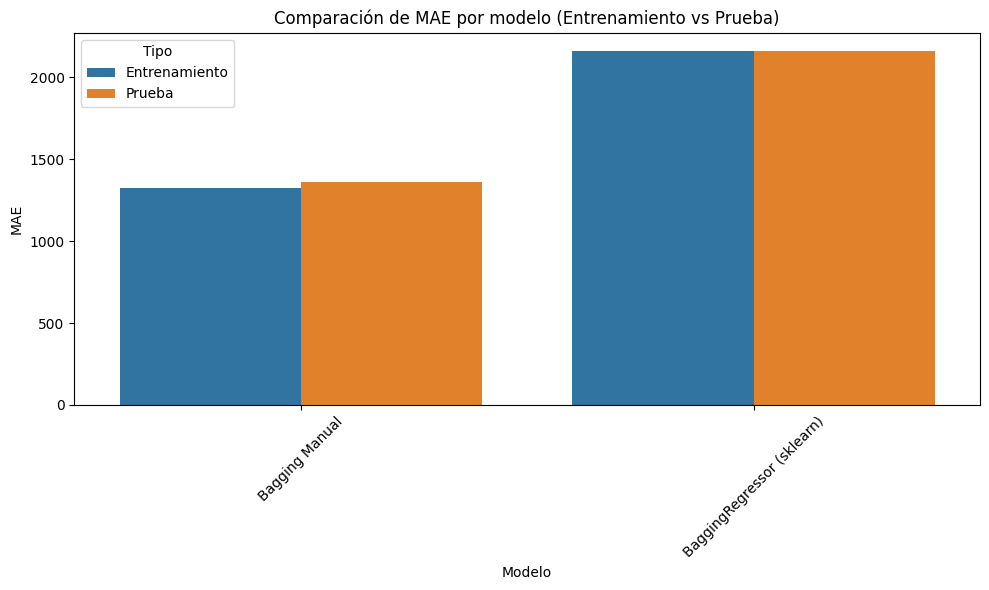

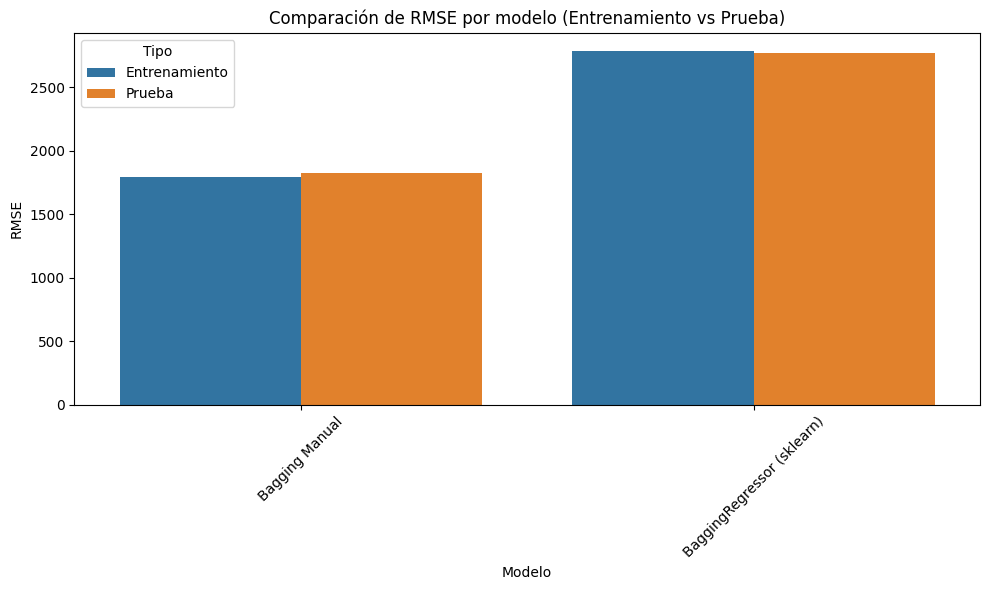

In [15]:
# Crear DataFrame a partir de los resultados
df_resultados = pd.DataFrame(resultados_modelos)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfica de MAE
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados[df_resultados["Metrica"] == "MAE"], x='Modelo', y='Valor', hue='Tipo')
plt.title("Comparación de MAE por modelo (Entrenamiento vs Prueba)")
plt.ylabel("MAE")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfica de RMSE
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados[df_resultados["Metrica"] == "RMSE"], x='Modelo', y='Valor', hue='Tipo')
plt.title("Comparación de RMSE por modelo (Entrenamiento vs Prueba)")
plt.ylabel("RMSE")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Celda 8
